### Comuting PCA using the covariance method

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.utils.extmath import fast_dot
from numpy import mean,cov,double,cumsum,dot,linalg,array,rank

iris = load_iris()
X = iris.data
print(X.shape)
y = iris.target
print(y.shape)

(150, 4)
(150,)


In [31]:
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
pca = PCA(n_components=4)
pca.fit(X)
print("Magnitud de los vectores (λ):")
print(pca.explained_variance_ )
print("Transpuesta de la Dirección de cada vector (v): (algunas cambiaron signo) ")
print(pca.components_)
print()
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


Magnitud de los vectores (λ):
[ 4.22484077  0.24224357  0.07852391  0.02368303]
Transpuesta de la Dirección de cada vector (v): (algunas cambiaron signo) 
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]

[ 0.92461621  0.05301557  0.01718514  0.00518309]
[ 25.08986398   6.00785254   3.42053538   1.87850234]


In [9]:
# https://en.wikipedia.org/wiki/Principal_component_analysis#Computing_PCA_using_the_covariance_method

# 1. Organize the data set
n = 150
p = 4
X.shape  # 150x4 ~ n x p

# 2. Calculate the empirical mean
mean = X.mean(axis=0) 
mean.shape  # p x 1 ~ 4 x 1

# 3. Calculate the deviations from the mean
h = np.ones((n,1))
B = X - h * mean.T
B.shape  # 150x4 ~ n x p

# 4. Find the covariance matrix
C = (1/(n-1))*B.T.dot(B)  # n-1 because Bessel's correction
print("Covariance Matrix:")
print(C)
print(" > solve this matrix (diagonalize)")


Covariance Matrix:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
 > solve this matrix (diagonalize)


In [19]:
print("Using numpy to compute Covariance Matrix:")
u = mean(X, axis=0)
u.shape  # 4 x 1
h = np.ones((n,1))
M = X - h * u.T  # 150x4
S = cov(M.T) 
print(S)

Using numpy to compute Covariance Matrix:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


In [32]:
# 5. Solve linear equation (find eigenvalues, eigenvectors)
# beware of error theor. e-values are 1 +/- 1e-9
[latent,coef] = linalg.eig(S)
print("Magnitud de los vectores (λ):")
print(latent)
print("Dirección de cada vector (v):")
print(coef)

# 6. Reorder λ & v in decreasing order
_lambda = latent

# score = dot(coeff.T,M) # projection of the data in the new space
# return coeff,score,latent

Magnitud de los vectores (λ):
[ 4.22484077  0.24224357  0.07852391  0.02368303]
Dirección de cada vector (v):
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


In [36]:
print("PC1 total variation: ", _lambda[0]/sum(_lambda))
print("PC1,PC2 total variation: ", (_lambda[0]+_lambda[1])/sum(_lambda))

PC1 total variation:  0.924616207174
PC1,PC2 total variation:  0.977631775025


#### A simple example based on https://glowingpython.blogspot.pe/2011/07/principal-component-analysis-with-numpy.html

In [84]:
A = array([ [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9],
            [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1] ])
A = A.T
n,p = A.shape

# computing PCA using covariance method (see wikipedia)
u = mean(A, axis=0)
h = np.ones((n,1))
M = A - h * u.T 
S = cov(M.T) 
_lambda,_v = linalg.eig(S)
print("eigenvalues (magnitud de vectores)")
print(_lambda)
print(cumsum(_lambda)/sum(_lambda), " (% cumulativo)") 

print("eigenvector (dirección de vector o vector unidad)")
print(_v)

P = M.dot(_v)
print("P = X'*v  (nuevos valores) OJO: X' = X-u")
print(P)

eigenvalues (magnitud de vectores)
[ 1.28402771  0.0490834 ]
[ 0.96318131  1.        ]  (% cumulativo)
eigenvector (dirección de vector o vector unidad)
[[ 0.73517866 -0.6778734 ]
 [ 0.6778734   0.73517866]]
P = X'*v  (nuevos valores) OJO: X' = X-u
[[ 0.82797019  0.17511531]
 [-1.77758033 -0.14285723]
 [ 0.99219749 -0.38437499]
 [ 0.27421042 -0.13041721]
 [ 1.67580142  0.20949846]
 [ 0.9129491  -0.17528244]
 [-0.09910944  0.3498247 ]
 [-1.14457216 -0.04641726]
 [-0.43804614 -0.01776463]
 [-1.22382056  0.16267529]]


(-0.040249412476677515,
 3.7584705058407883,
 1.0482329315455878,
 2.8938936699264)

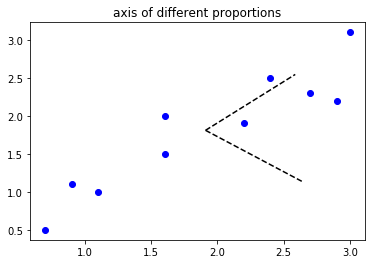

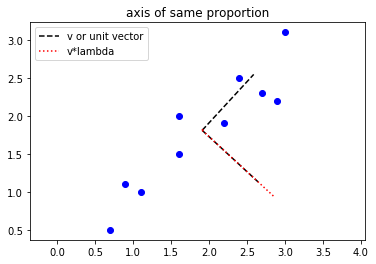

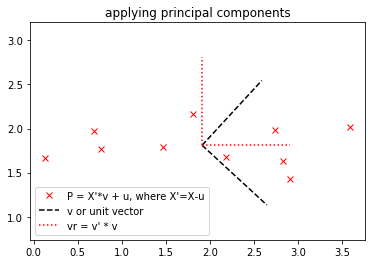

In [89]:
%matplotlib inline
from pylab import plot,subplot,axis,stem,show,figure,title,legend

figure()
title("axis of different proportions")
plot(A[:,0], A[:,1], 'ob')
plot([0,_v[0,0]]+u[0], [0,_v[0,1]]+u[1], '--k')
plot([0,_v[1,0]]+u[0], [0,_v[1,1]]+u[1], '--k')


figure()
title("axis of same proportion")
plot(A[:,0], A[:,1], 'ob')
# vector unidad: (0,0) -> (_v[0,0], _v[0,1]) 
plot([0,_v[0,0]]+u[0], [0,_v[0,1]]+u[1], '--k', label='v or unit vector')
# vector unidad: (0,0) -> (_v[1,0], _v[1,1]) 
plot([0,_v[1,0]]+u[0], [0,_v[1,1]]+u[1], '--k')
#
plot([0,_v[0,0]*_lambda[0]]+u[0], [0,_v[0,1]*_lambda[0]]+u[1], ':r', label='v*lambda')
plot([0,_v[1,0]*_lambda[1]]+u[0], [0,_v[1,1]*_lambda[1]]+u[1], ':r')
legend()
axis('equal')  # KEY: axis must be of the same proportion


figure()
title("applying principal components")
# plot(P[:,0], P[:,1], 'or', label='P = X*v')
plot(P[:,0] + u[0], P[:,1] + u[1], 'xr', label="P = X'*v + u, where X'=X-u")
# vector unidad: (0,0) -> (_v[0,0] + u[0], _v[0,1] + u[1]) 
plot([0,_v[0,0]]+u[0], [0,_v[0,1]]+u[1], '--k', label='v or unit vector')
# vector unidad: (0,0) -> (_v[1,0] + u[0], _v[1,1] + u[1]) 
plot([0,_v[1,0]]+u[0], [0,_v[1,1]]+u[1], '--k')
_vr = _v.T.dot(_v)
plot([0,_vr[0,0]]+u[0], [0,_vr[0,1]]+u[1], ':r', label="vr = v' * v")
plot([0,_vr[1,0]]+u[0], [0,_vr[1,1]]+u[1], ':r')
legend()
axis('equal')  # KEY: axis must be of the same proportion
